# Kaggle Rossmann store with RandomForest regressor
#### This experiment is based on Rossmann Store Sales
[PDP Source Code](https://github.com/SauceCat/PDPbox)<br>

An ICE plot visualizes the dependence of the prediction on a feature for each instance separately, resulting in one line per instance, compared to one line overall in partial dependence plots. A PDP is the average of the lines of an ICE plot. 

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
from pdpbox import pdp, get_dataset, info_plots

In [2]:
test_ross = get_dataset.ross()
test_ross.keys()

dict_keys(['data', 'features', 'rf_model', 'target'])

In [3]:
ross_data = test_ross['data'] #actual dataset
ross_features = test_ross['features'] # col / feature names
ross_model = test_ross['rf_model']
ross_target = test_ross['target'] # feature name

In [4]:
ross_model

RandomForestRegressor(bootstrap=True, ccp_alpha=None, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## Binary feature: SchoolHoliday
Lets check out the schoolholiday feature in relation to our target, more of a descriptive, visual way

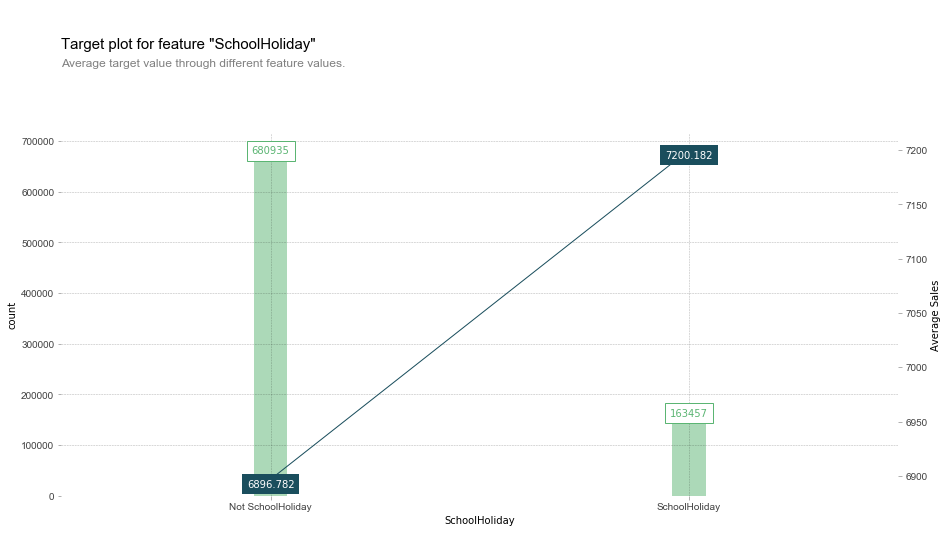

In [5]:
fig, axes, summary_df = info_plots.target_plot(df=ross_data, feature='SchoolHoliday',feature_name='SchoolHoliday',
                      target=ross_target)

_ = axes['bar_ax'].set_xticklabels(['Not SchoolHoliday','SchoolHoliday'])

In [6]:
summary_df

,x,display_column,count,Sales
0,0,SchoolHoliday_0,680935,6896.782411
1,1,SchoolHoliday_1,163457,7200.181650


### check prediction distribution through feature 'SchoolHoliday'
This is a visualization of the predictions broken by school holiday vs non school holiday

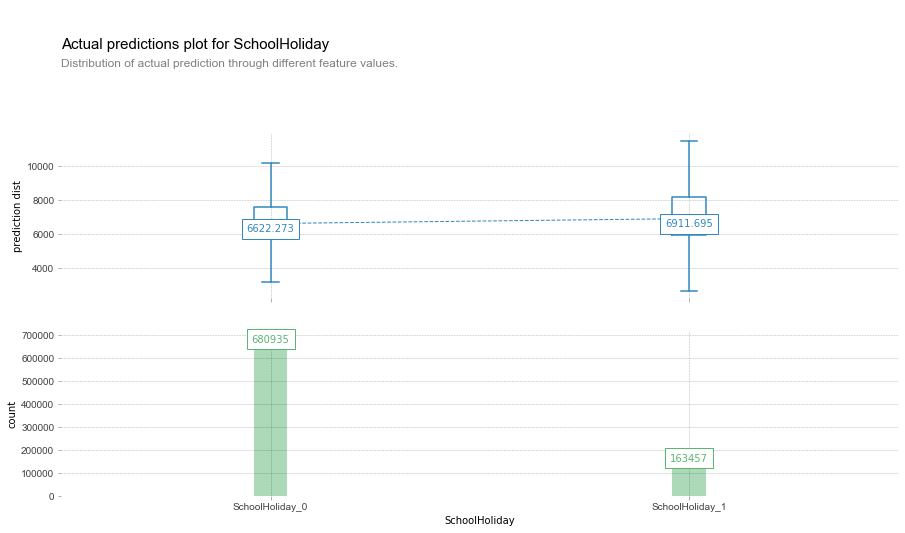

In [7]:
fig, axes, summary_df = info_plots.actual_plot(
    model=ross_model, X=ross_data[ross_features], feature='SchoolHoliday', feature_name='SchoolHoliday'
)

## pdp for feature 'SchoolHoliday'

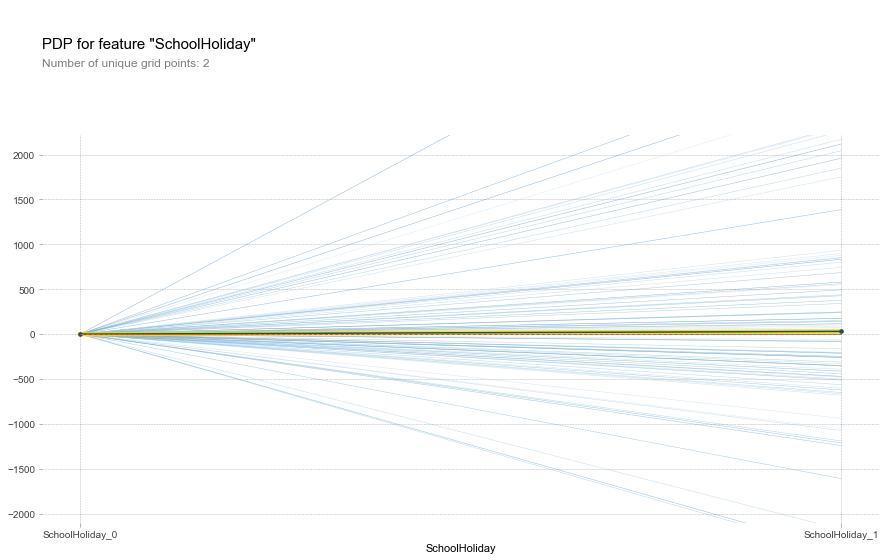

In [8]:
pdp_SchoolHoliday = pdp.pdp_isolate(model = ross_model, dataset=ross_data, model_features=ross_features, feature= 'SchoolHoliday')

fig, axes = pdp.pdp_plot(pdp_SchoolHoliday, 'SchoolHoliday',
                        plot_lines=True, frac_to_plot=100)

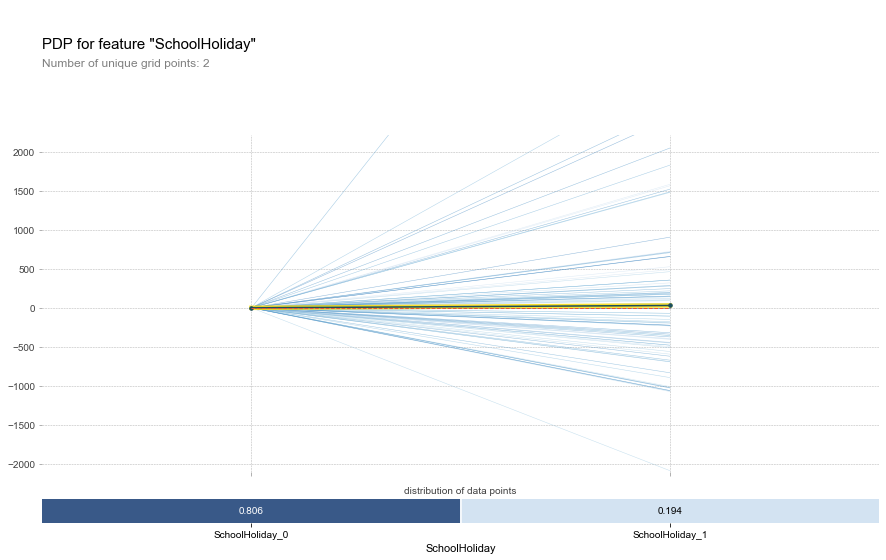

In [9]:
## gives you additional data points on the distribition between holiday and non holiday
fig, axes = pdp.pdp_plot(pdp_SchoolHoliday, 'SchoolHoliday',
                        plot_lines=True, frac_to_plot=100,plot_pts_dist=True)

### one-hot encoding feature: StoreType
#### target distribution through feature 'StoreType'
A quick and easy way to visualize counts & average

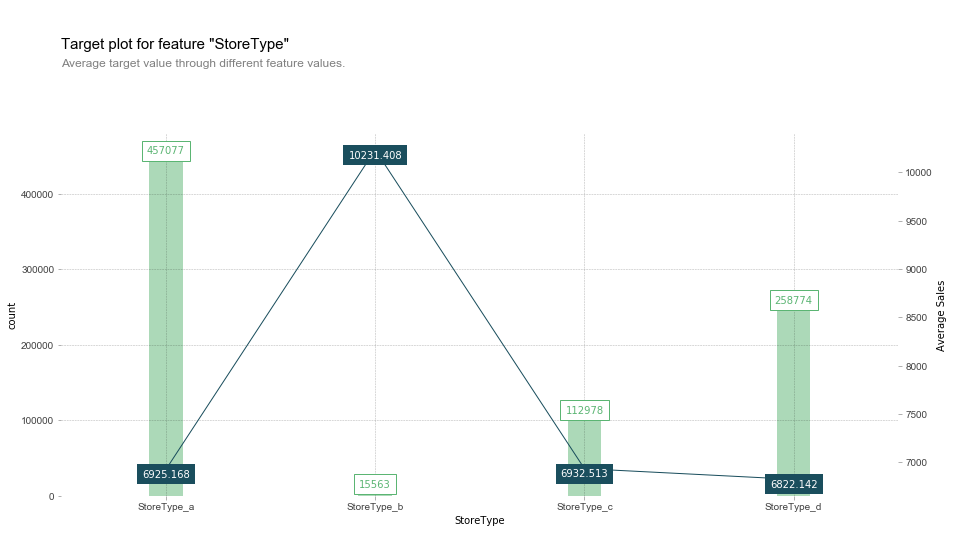

In [10]:
fig, axes, summary_df = info_plots.target_plot(
df = ross_data, feature = ['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d'],
feature_name='StoreType', target=ross_target)

In [11]:
summary_df

,x,display_column,count,Sales
0,0,StoreType_a,457077,6925.167661
1,1,StoreType_b,15563,10231.407505
2,2,StoreType_c,112978,6932.512755
3,3,StoreType_d,258774,6822.141881


#### check prediction distribution through feature 'StoreType'

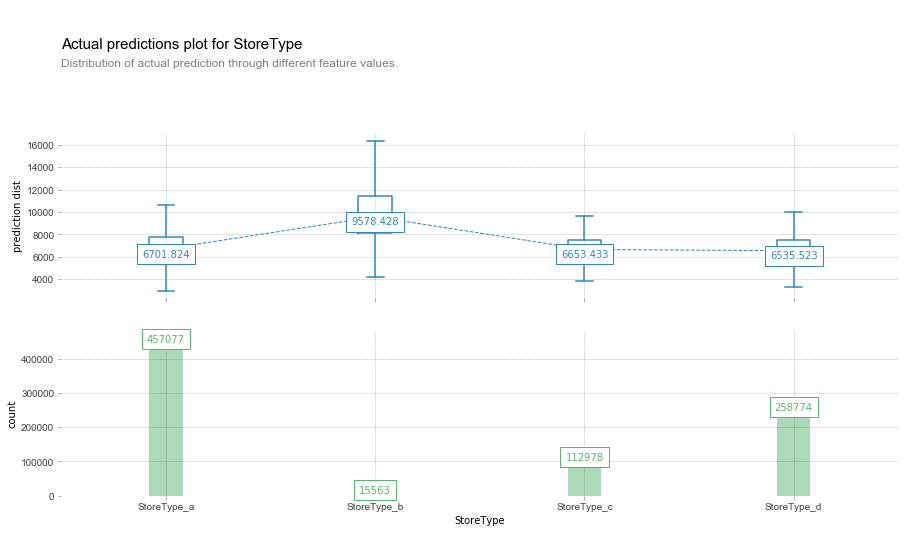

In [12]:
fig, axes, summary_df = info_plots.actual_plot(
    model=ross_model, X=ross_data[ross_features], 
    feature=['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d'], feature_name='StoreType'
)

### pdp for feature 'StoreType

Wall time: 14.4 s


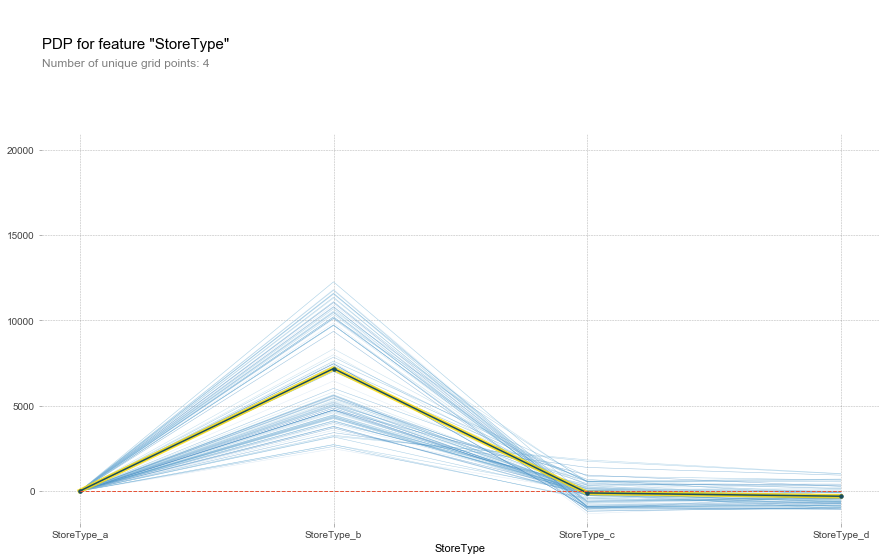

In [13]:
%%time
pdp_StoreType = pdp.pdp_isolate(
    model=ross_model, dataset=ross_data, model_features=ross_features, 
    feature=['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d']
)
fig, axes = pdp.pdp_plot(pdp_StoreType, 'StoreType', plot_lines=True, frac_to_plot=100)

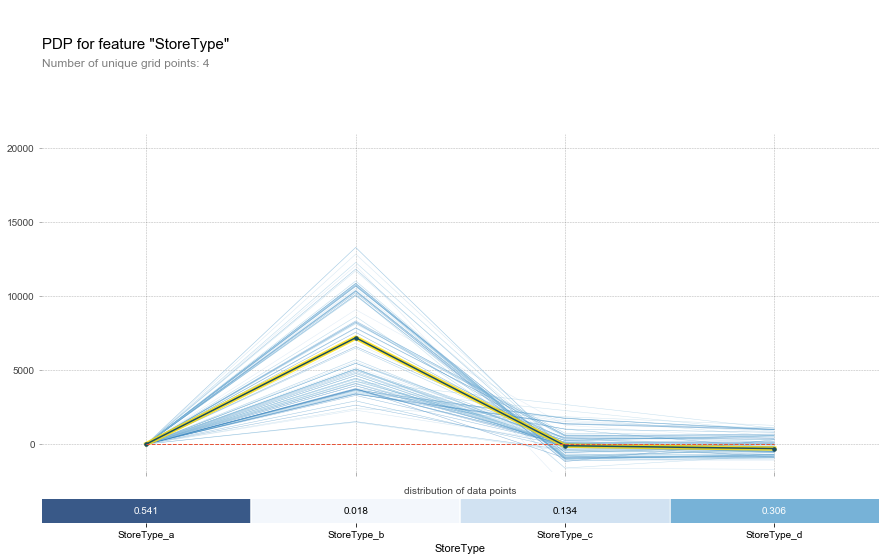

In [14]:
fig, axes = pdp.pdp_plot(pdp_StoreType, 'StoreType', plot_lines=True, frac_to_plot=100, plot_pts_dist=True)

### Numeric feature: weekofyear

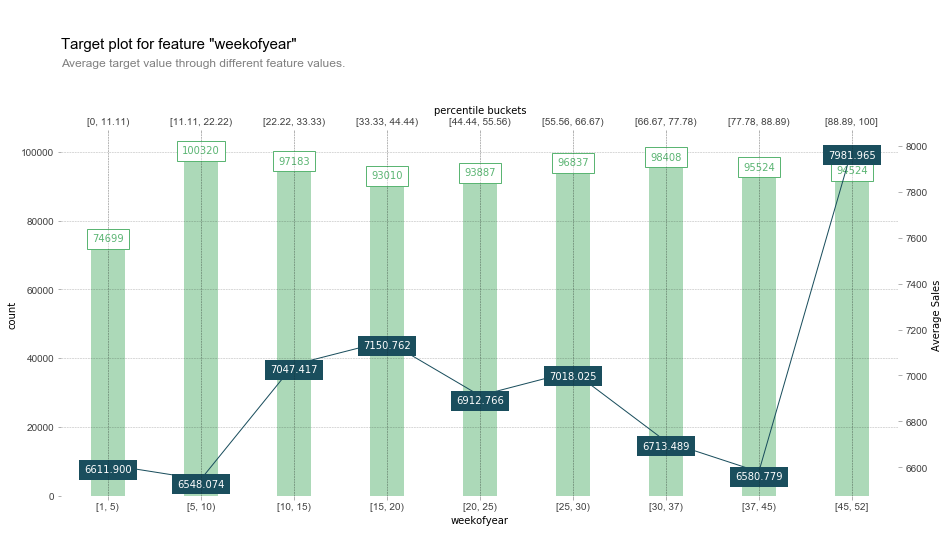

In [15]:
fig, axes, summary_df = info_plots.target_plot(
    df=ross_data, feature='weekofyear', feature_name='weekofyear', target=ross_target, show_percentile=True
)

In [16]:
summary_df

,x,display_column,value_lower,value_upper,percentile_column,percentile_lower,percentile_upper,count,Sales
0,0,"[1, 5)",1.0,5.0,"[0, 11.11)",0.00,11.11,74699,6611.900307
1,1,"[5, 10)",5.0,10.0,"[11.11, 22.22)",11.11,22.22,100320,6548.074412
2,2,"[10, 15)",10.0,15.0,"[22.22, 33.33)",22.22,33.33,97183,7047.416801
3,3,"[15, 20)",15.0,20.0,"[33.33, 44.44)",33.33,44.44,93010,7150.762251
4,4,"[20, 25)",20.0,25.0,"[44.44, 55.56)",44.44,55.56,93887,6912.765740
5,5,"[25, 30)",25.0,30.0,"[55.56, 66.67)",55.56,66.67,96837,7018.025414
6,6,"[30, 37)",30.0,37.0,"[66.67, 77.78)",66.67,77.78,98408,6713.488893
7,7,"[37, 45)",37.0,45.0,"[77.78, 88.89)",77.78,88.89,95524,6580.778694
8,8,"[45, 52]",45.0,52.0,"[88.89, 100]",88.89,100.00,94524,7981.965109


### check prediction distribution through feature 'weekofyear'

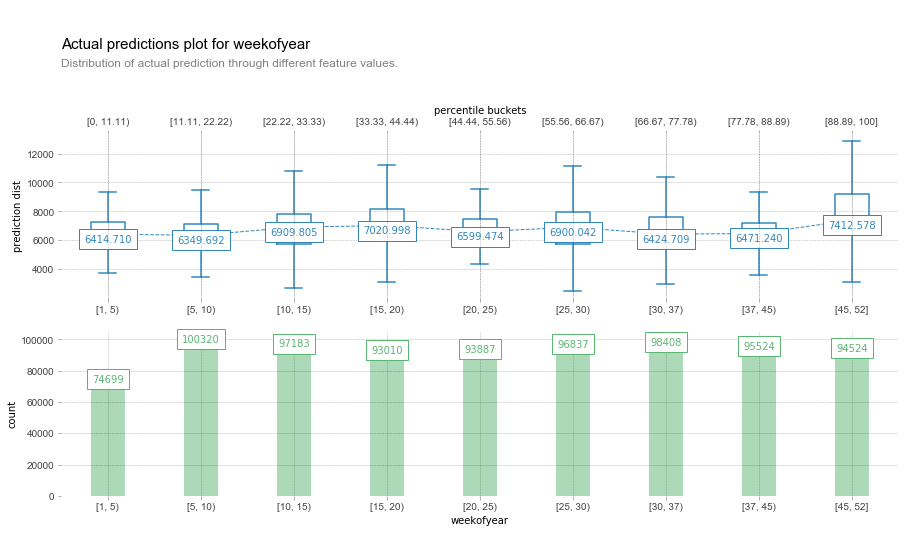

In [17]:
fig, axes, summary_df = info_plots.actual_plot(
    model=ross_model, X=ross_data[ross_features], feature='weekofyear', feature_name='weekofyear', 
    show_percentile=True
)

### pdp for feature 'weekofyear'¶

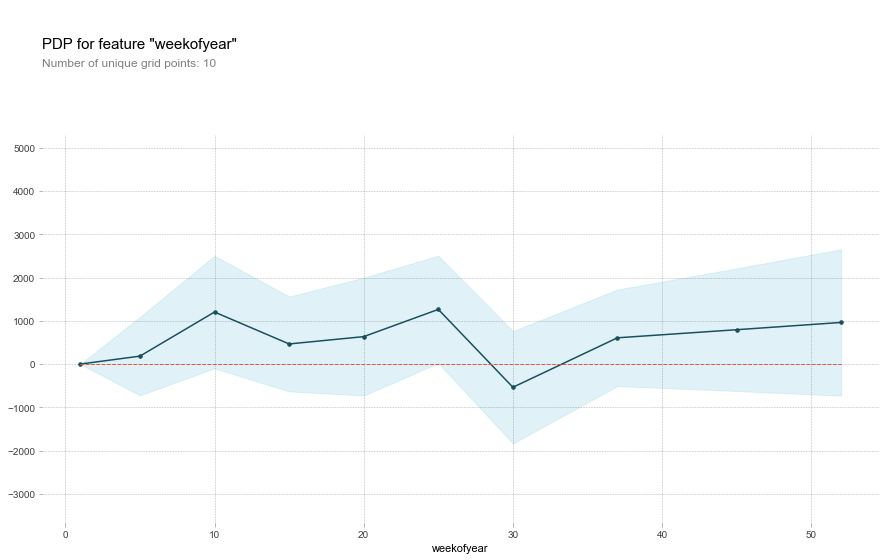

In [18]:
pdp_weekofyear = pdp.pdp_isolate(
    model=ross_model, dataset=ross_data, model_features=ross_features, feature='weekofyear'
)
fig, axes = pdp.pdp_plot(pdp_weekofyear, 'weekofyear')

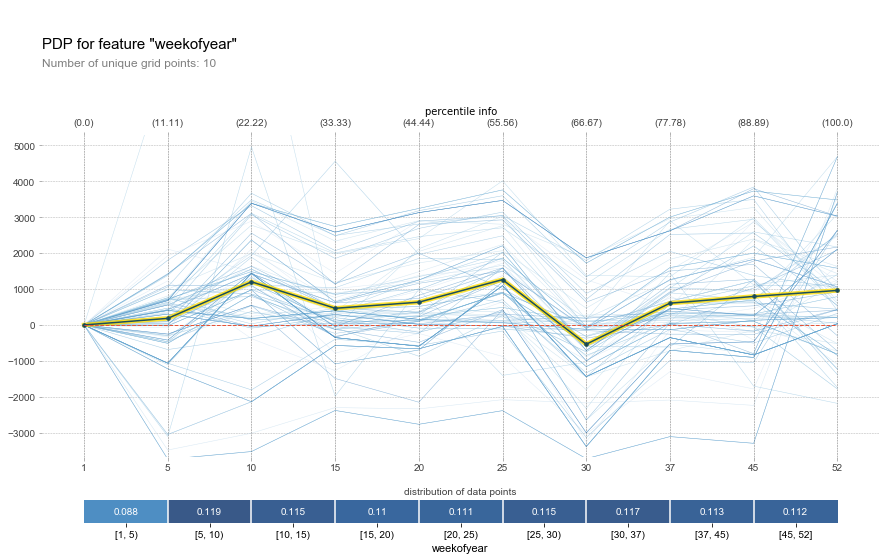

In [19]:
fig, axes = pdp.pdp_plot(
    pdp_weekofyear, 'weekofyear', plot_lines=True, frac_to_plot=100, x_quantile=True, 
    plot_pts_dist=True, show_percentile=True
)

## Interaction between two variables: weekofyear and StoreType¶

### target distribution through feature combination of 'weekofyear' and 'StoreType'

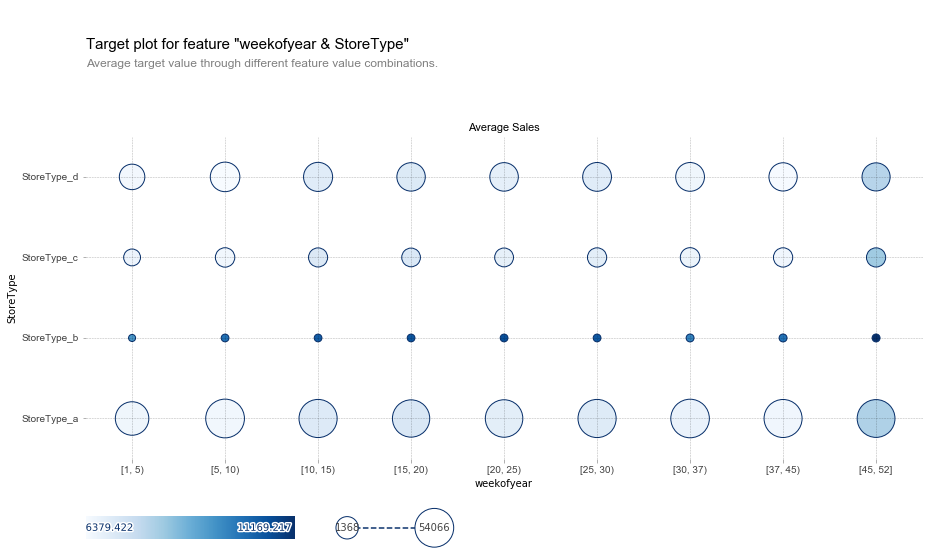

In [20]:
fig, axes, summary_df = info_plots.target_plot_interact(
    df=ross_data, features=['weekofyear', ['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d']], 
    feature_names=['weekofyear', 'StoreType'], target=ross_target
)

In [21]:
summary_df.head()

,x1,x2,display_column_1,display_column_2,value_lower_1,value_upper_1,count,Sales
0,0,0,"[1, 5)",StoreType_a,1.0,5.0,40316,6569.986060
1,0,1,"[1, 5)",StoreType_b,1.0,5.0,1368,9288.116959
2,0,2,"[1, 5)",StoreType_c,1.0,5.0,9866,6637.681026
3,0,3,"[1, 5)",StoreType_d,1.0,5.0,23149,6515.757830
4,1,0,"[5, 10)",StoreType_a,5.0,10.0,54066,6538.169718


### prediction distribution through feature combination of 'weekofyear' and 'StoreType'

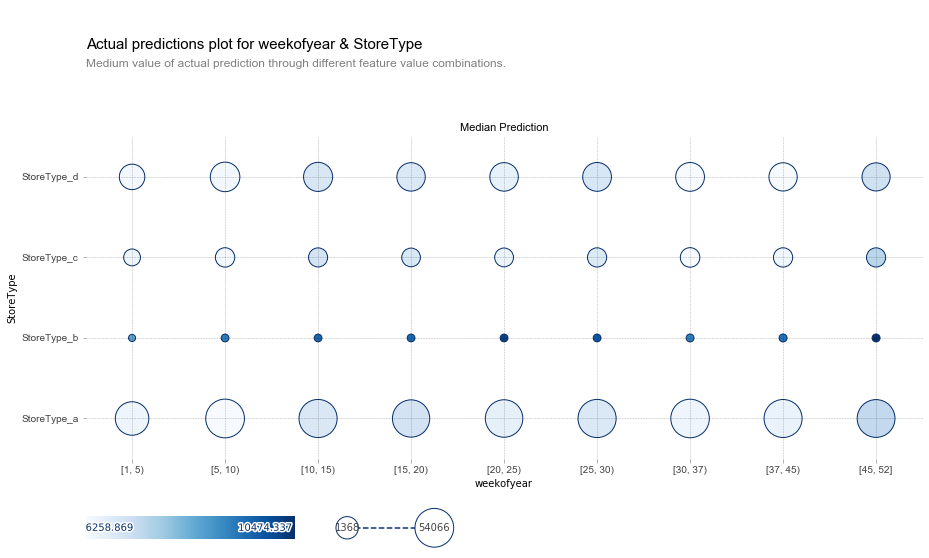

In [22]:
fig, axes, summary_df = info_plots.actual_plot_interact(
    model=ross_model, X=ross_data[ross_features], 
    features=['weekofyear', ['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d']], 
    feature_names=['weekofyear', 'StoreType']
)

### pdp for feature combination of 'weekofyear' and 'StoreType'

In [23]:
%%time
inter_rf = pdp.pdp_interact(
    model=ross_model, dataset=ross_data, model_features=ross_features, 
    features=['weekofyear', ['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d']]
)

Wall time: 4min 48s


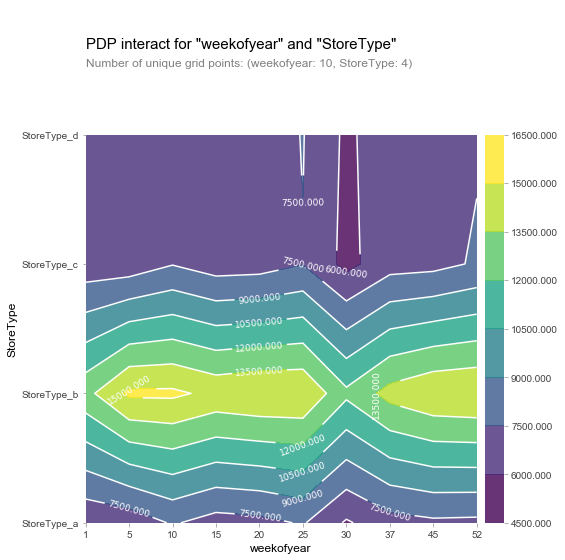

In [24]:
fig, axes = pdp.pdp_interact_plot(
    inter_rf, ['weekofyear', 'StoreType'], x_quantile=True, plot_type='contour', plot_pdp=False
)

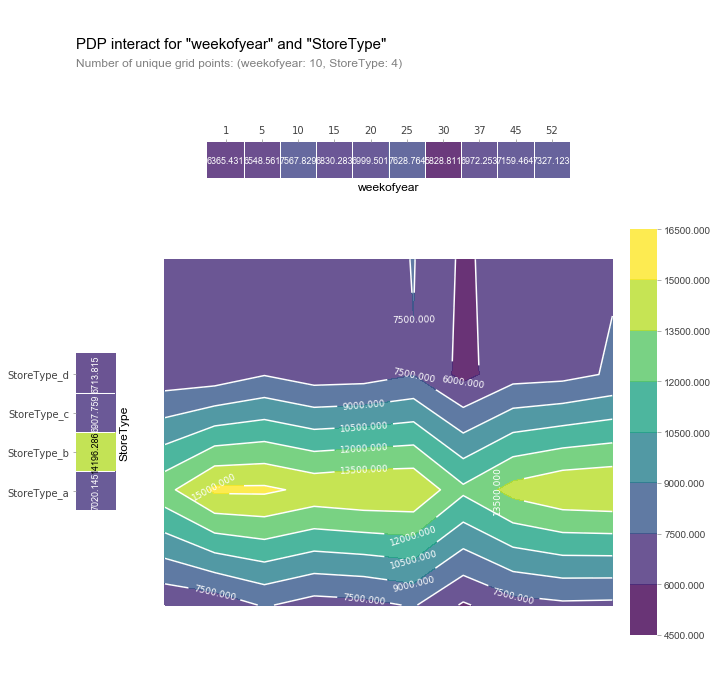

In [25]:
fig, axes = pdp.pdp_interact_plot(
    inter_rf, ['weekofyear', 'StoreType'], x_quantile=True, plot_type='contour', plot_pdp=True
)

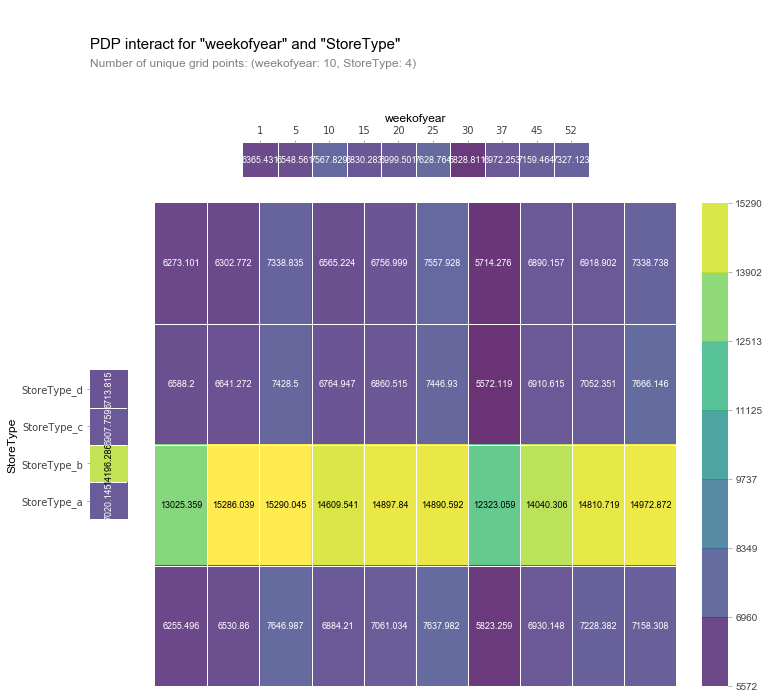

In [26]:
fig, axes = pdp.pdp_interact_plot(
    inter_rf, ['weekofyear', 'StoreType'], x_quantile=True, plot_type='grid', plot_pdp=True
)